In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast
from matplotlib.colors import to_hex
from matplotlib.patches import Patch

Text(0.5, 1.0, 'Print Books Sold')

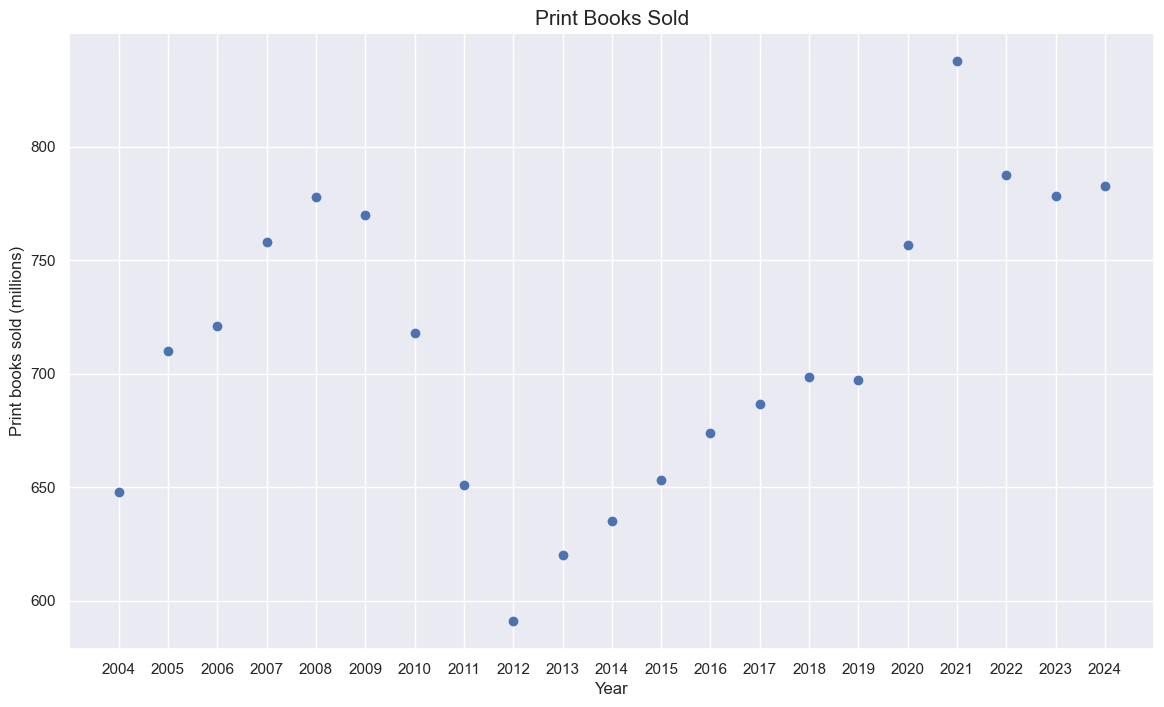

In [2]:
#Print books
sns.set_theme()
printBooks = pd.read_csv('../Data/print.csv')
year = printBooks['Year'].values
print = printBooks['Print books sold'].values
fig,ax = plt.subplots(figsize=(14,8))
ax.scatter(year,print)
ax.set_xticks(year)
ax.set_xlabel('Year')
ax.set_ylabel('Print books sold (millions)')
ax.set_title('Print Books Sold', fontsize=15)

Text(0.5, 1.0, 'E-books Sold')

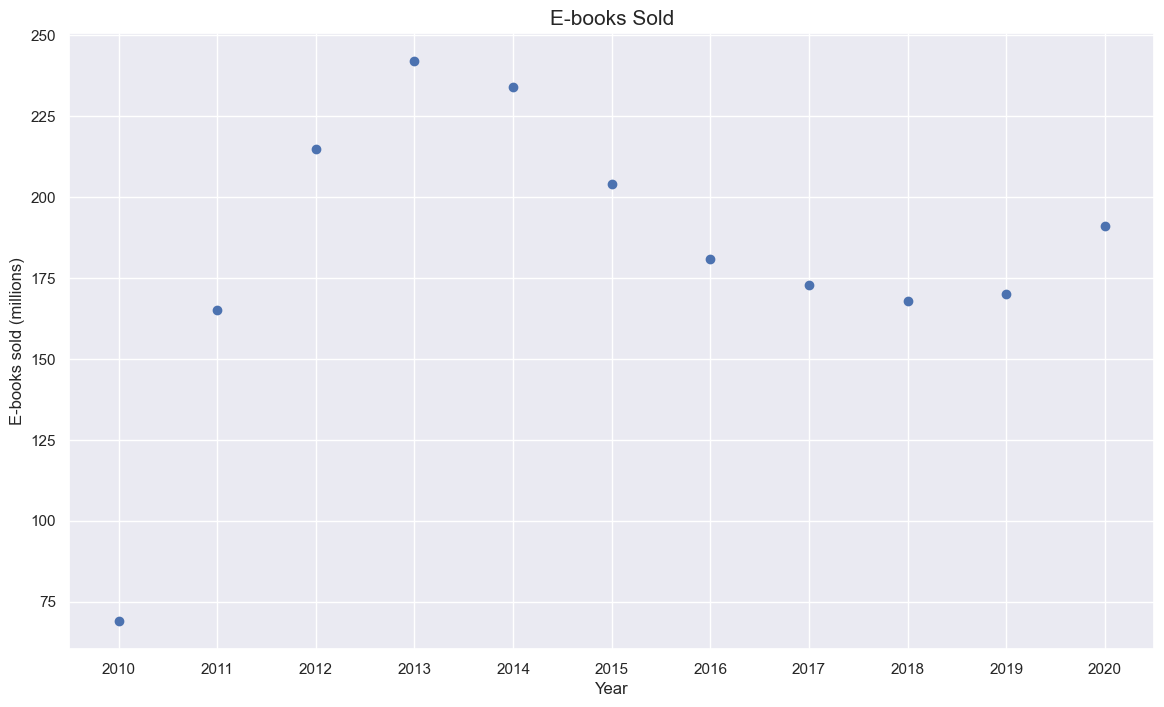

In [3]:
#E books
sns.set_theme()
eBooks = pd.read_csv('../Data/ebook.csv')
year = eBooks['Year'].values
eBook = eBooks['E-books Sold'].values
fig,ax = plt.subplots(figsize=(14,8))
ax.scatter(year,eBook)
ax.set_xticks(year)
ax.set_xlabel('Year')
ax.set_ylabel('E-books sold (millions)')
ax.set_title('E-books Sold', fontsize=15)

Text(0.5, 1.0, 'Total Books Sold (Print + E-books)')

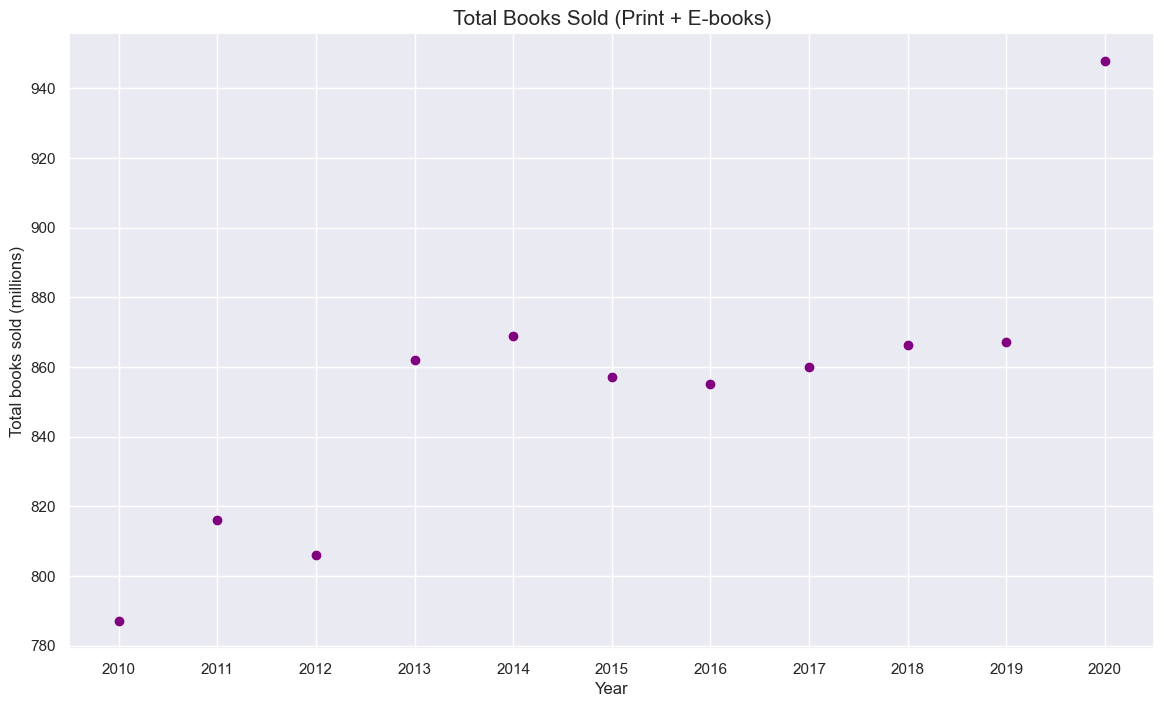

In [4]:
# Read datasets
sns.set_theme()
printBooks = pd.read_csv('../Data/print.csv')
eBooks = pd.read_csv('../Data/ebook.csv')

# Merge datasets on 'Year'
merged = pd.merge(printBooks, eBooks, on='Year')

# Calculate total books sold
merged['Total books sold'] = merged['Print books sold'] + merged['E-books Sold']
# Extract data
year = merged['Year'].values
total = merged['Total books sold'].values

# Plot total books sold
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(year, total, color='purple')
ax.set_xticks(year)
ax.set_xlabel('Year')
ax.set_ylabel('Total books sold (millions)')
ax.set_title('Total Books Sold (Print + E-books)', fontsize=15)

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Tiktok users reading more because of #BookTok by state')

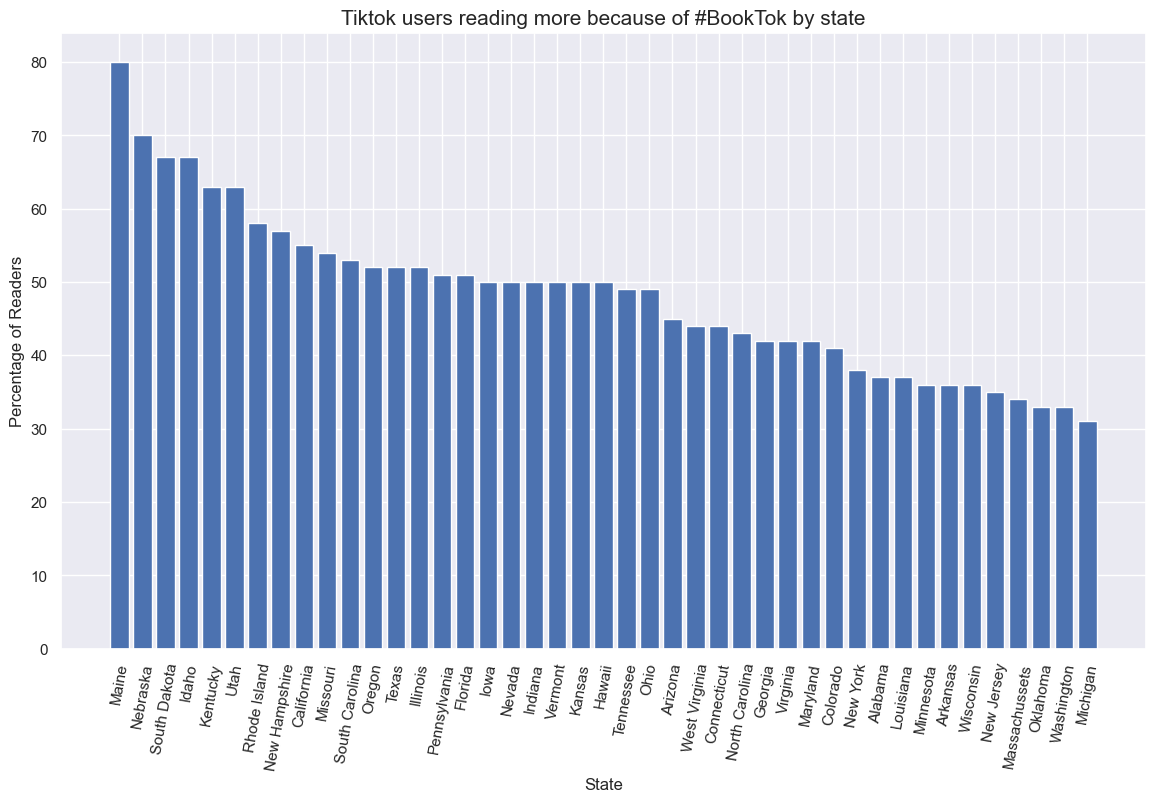

In [5]:
#TikTok
sns.set_theme()
plt.tight_layout()
plt.show()

tiktokData = pd.read_csv('../Data/tiktok.csv')

states = tiktokData['State'].values
values = tiktokData['Percentage of TikTok users reading more books'].values
fig,ax = plt.subplots(figsize=(14,8))
ax.bar(states, values)
ax.set_xlabel('State')
ax.tick_params(axis='x',rotation=80)
ax.set_ylabel('Percentage of Readers')
ax.set_title('Tiktok users reading more because of #BookTok by state', fontsize=15)


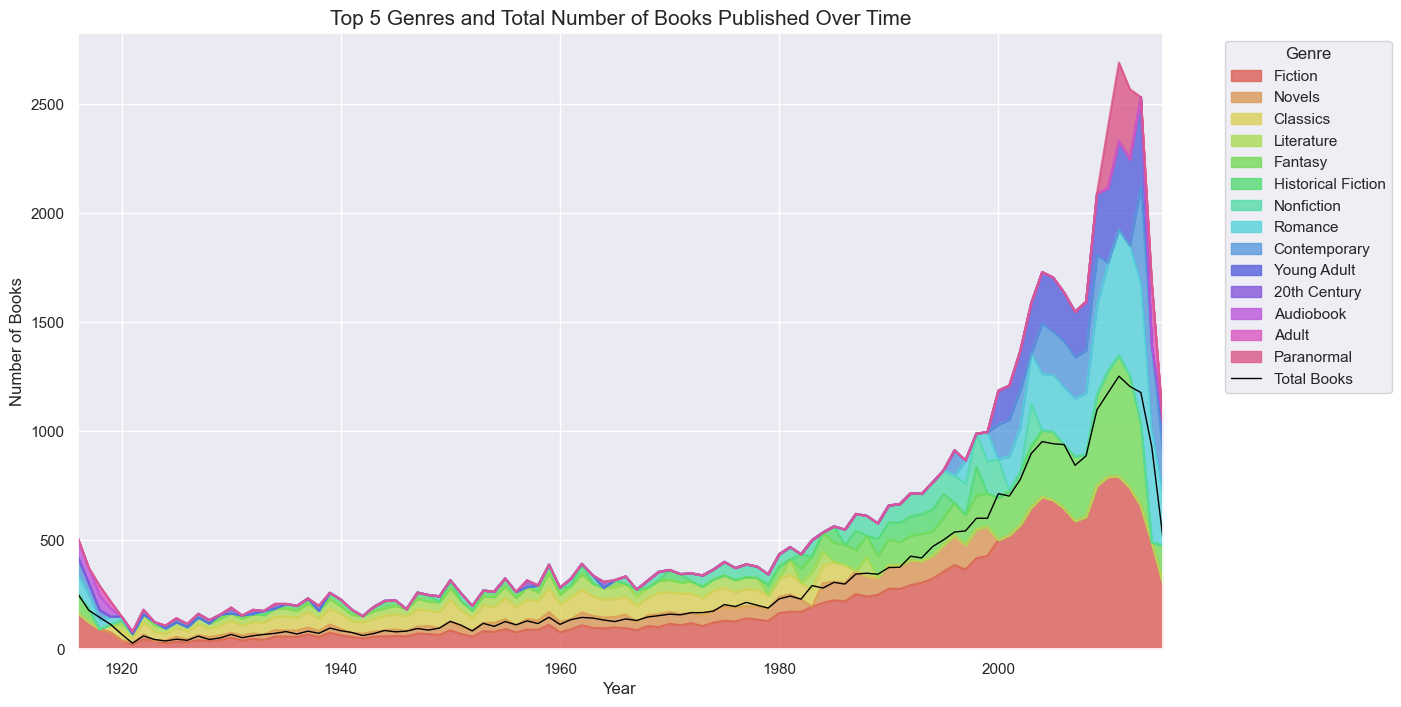

In [24]:
# Load Data
books = pd.read_csv("../Data/Best_Books_Ever.csv")

# Clean and process the data
def clean_genres(s):
    if pd.isna(s) or s == "[]" or s == "":
        return []
    try:
        # Convert string representation of list to actual list
        genres_list = ast.literal_eval(s)
        # Clean each genre by removing punctuation
        cleaned = [g.strip().replace('[', '').replace(']', '').replace("'", "").replace('"', '') 
                  for g in genres_list if g.strip()]
        return cleaned
    except:
        return []

# Filter and clean data
df = books[['bookId', 'genres', 'firstPublishDate']].copy()
df = df[df['genres'].notna() & df['firstPublishDate'].notna() & (df['genres'] != "[]")]

# Clean genres
df['genres'] = df['genres'].apply(clean_genres)
df = df[df['genres'].apply(len) > 0]  # Remove rows with empty genre lists
df = df.explode('genres')
df['genres'] = df['genres'].str.replace(r'[^\w\s]', '', regex=True)

# Extract year from firstPublishDate
# Handle the 2-digit year format from your R script
df['year_str'] = df['firstPublishDate'].str[-2:]  # Get last 2 digits
df['year'] = df['year_str'].apply(lambda x: int(f"19{x}") if pd.notna(x) and int(x) > 15 else int(f"20{x}") if pd.notna(x) else None)
df = df[df['year'].notna()]
df['year'] = df['year'].astype(int)

# Remove duplicate bookId-year combinations (like R's distinct)
df_unique = df.drop_duplicates(['bookId', 'year'])

# Count books per year + genre
genre_counts = df.groupby(['year', 'genres']).size().reset_index(name='count')

# Find top 5 genres PER YEAR (matches R's slice_max)
df_top5 = genre_counts.groupby('year').apply(
    lambda x: x.nlargest(5, 'count')
).reset_index(drop=True)

# Get year range from data
min_year = df['year'].min()
max_year = df['year'].max()

# Calculate total books per year for the black line (using unique books only)
year_totals = df_unique.groupby('year').size()

# Create complete year range and fill missing values
all_years = range(min_year, max_year + 1)
df_top5_complete = df_top5.set_index(['year', 'genres'])['count'].unstack(fill_value=0)
df_top5_complete = df_top5_complete.reindex(all_years, fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Stacked area plot
# Filter to genres that appear in top 5 for more than 1 year
top_genres_multiple_years = df_top5['genres'].value_counts()
reliable_genres = top_genres_multiple_years[top_genres_multiple_years > 1].index

# Filter dataframe
df_top5 = df_top5[df_top5['genres'].isin(reliable_genres)]

# Pick enough distinct colors
palette = sns.color_palette("hls", n_colors=len(reliable_genres))  # or "tab10", "pastel", etc.

# Map genres to specific colors
genre_color_map = dict(zip(reliable_genres, map(to_hex, palette)))

df_top5_complete = df_top5_complete[reliable_genres]

colors = [genre_color_map[genre] for genre in df_top5_complete.columns]


df_top5_complete.plot.area(ax=ax, alpha=0.8, color=colors)




# Add total books line (black line from R script)
year_totals_complete = year_totals.reindex(all_years, fill_value=0)
ax.plot(year_totals_complete.index, year_totals_complete.values, color='black', linewidth=1, label='Total Books')

# Axis labels, limits, title
ax.set_xlabel("Year")
ax.set_ylabel("Number of Books")
ax.set_xlim(min_year, max_year)
ax.set_title("Top 5 Genres and Total Number of Books Published Over Time", fontsize=15)


ax.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')

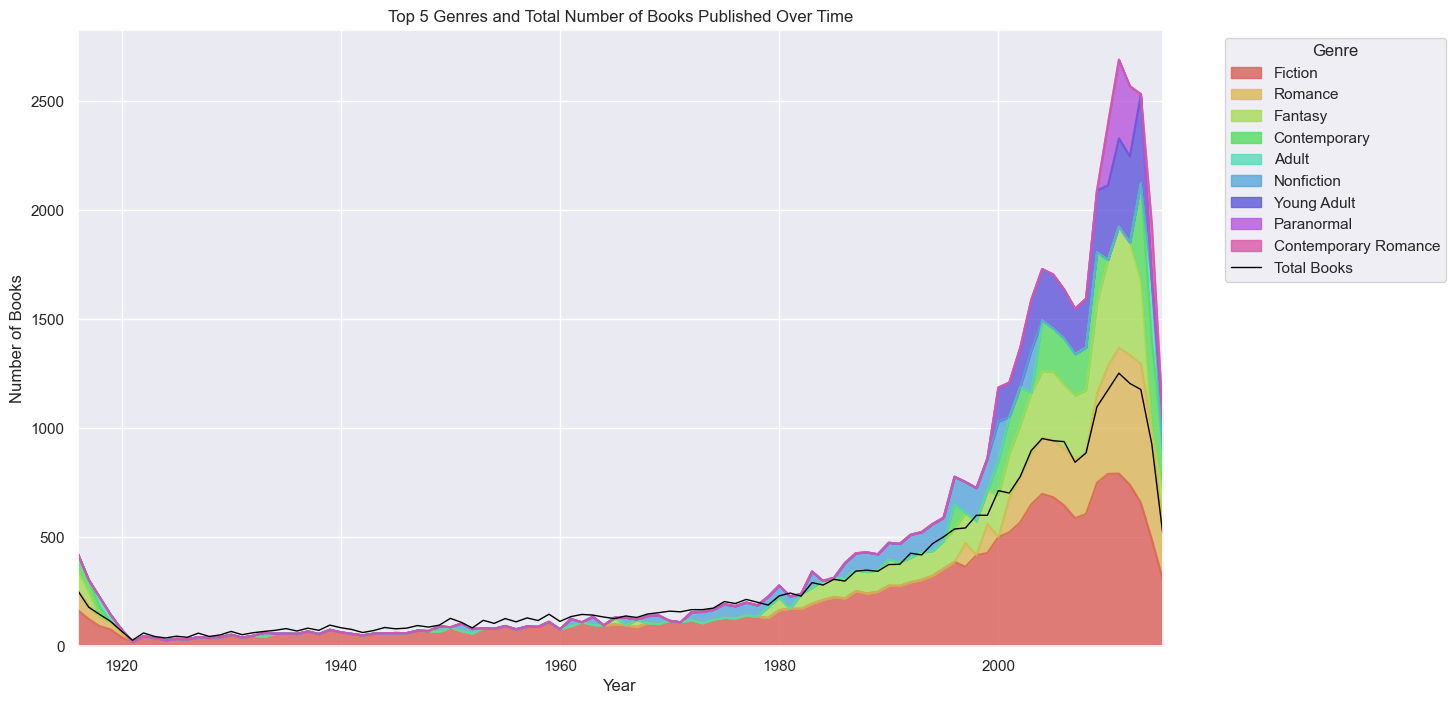

In [ ]:
# Load Data
books = pd.read_csv("../Data/Best_Books_Ever.csv")

# Clean and process the data
def clean_genres(s):
    if pd.isna(s) or s == "[]" or s == "":
        return []
    try:
        # Convert string representation of list to actual list
        genres_list = ast.literal_eval(s)
        # Clean each genre by removing punctuation
        cleaned = [g.strip().replace('[', '').replace(']', '').replace("'", "").replace('"', '') 
                  for g in genres_list if g.strip()]
        return cleaned
    except:
        return []

# Filter and clean data
df = books[['bookId', 'genres', 'firstPublishDate']].copy()
df = df[df['genres'].notna() & df['firstPublishDate'].notna() & (df['genres'] != "[]")]

# Clean genres
df['genres'] = df['genres'].apply(clean_genres)
df = df[df['genres'].apply(len) > 0]  # Remove rows with empty genre lists
df = df.explode('genres')
df['genres'] = df['genres'].str.replace(r'[^\w\s]', '', regex=True)

# Extract year from firstPublishDate
# Handle the 2-digit year format from your R script
df['year_str'] = df['firstPublishDate'].str[-2:]  # Get last 2 digits
df['year'] = df['year_str'].apply(lambda x: int(f"19{x}") if pd.notna(x) and int(x) > 15 else int(f"20{x}") if pd.notna(x) else None)
df = df[df['year'].notna()]
df['year'] = df['year'].astype(int)

# Remove duplicate bookId-year combinations (like R's distinct)
df_unique = df.drop_duplicates(['bookId', 'year'])

# Count books per year + genre
genre_counts = df.groupby(['year', 'genres']).size().reset_index(name='count')

# Find top 5 genres PER YEAR (matches R's slice_max)
df_top5 = genre_counts.groupby('year').apply(
    lambda x: x.nlargest(5, 'count')
).reset_index(drop=True)

# Filter to only include genres that appear in top 5 after year 2000
genres_after_2000 = df_top5[df_top5['year'] > 2000]['genres'].unique()
df_top5 = df_top5[df_top5['genres'].isin(genres_after_2000)]

# Get year range from data
min_year = df['year'].min()
max_year = df['year'].max()

# Calculate total books per year for the black line (using unique books only)
year_totals = df_unique.groupby('year').size()

# Create complete year range and fill missing values
all_years = range(min_year, max_year + 1)
df_top5_complete = df_top5.set_index(['year', 'genres'])['count'].unstack(fill_value=0)
df_top5_complete = df_top5_complete.reindex(all_years, fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Stacked area plot
# Stacked area plot
unique_genres = df_top5['genres'].unique()
# Pick enough distinct colors
palette = sns.color_palette("hls", n_colors=len(unique_genres))  # or "tab10", "pastel", etc.

# Map genres to specific colors
genre_color_map = dict(zip(unique_genres, map(to_hex, palette)))

df_top5_complete = df_top5_complete[unique_genres]

colors = [genre_color_map[genre] for genre in df_top5_complete.columns]
df_top5_complete.plot.area(ax=ax, alpha=0.8, color=colors)


# Add total books line (black line from R script)
year_totals_complete = year_totals.reindex(all_years, fill_value=0)
ax.plot(year_totals_complete.index, year_totals_complete.values, color='black', linewidth=1, label='Total Books')

# Axis labels, limits, title
ax.set_xlabel("Year")
ax.set_ylabel("Number of Books")
ax.set_xlim(min_year, max_year)
ax.set_title("Top 5 Genres and Total Number of Books Published Over Time")

# Legend
ax.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')


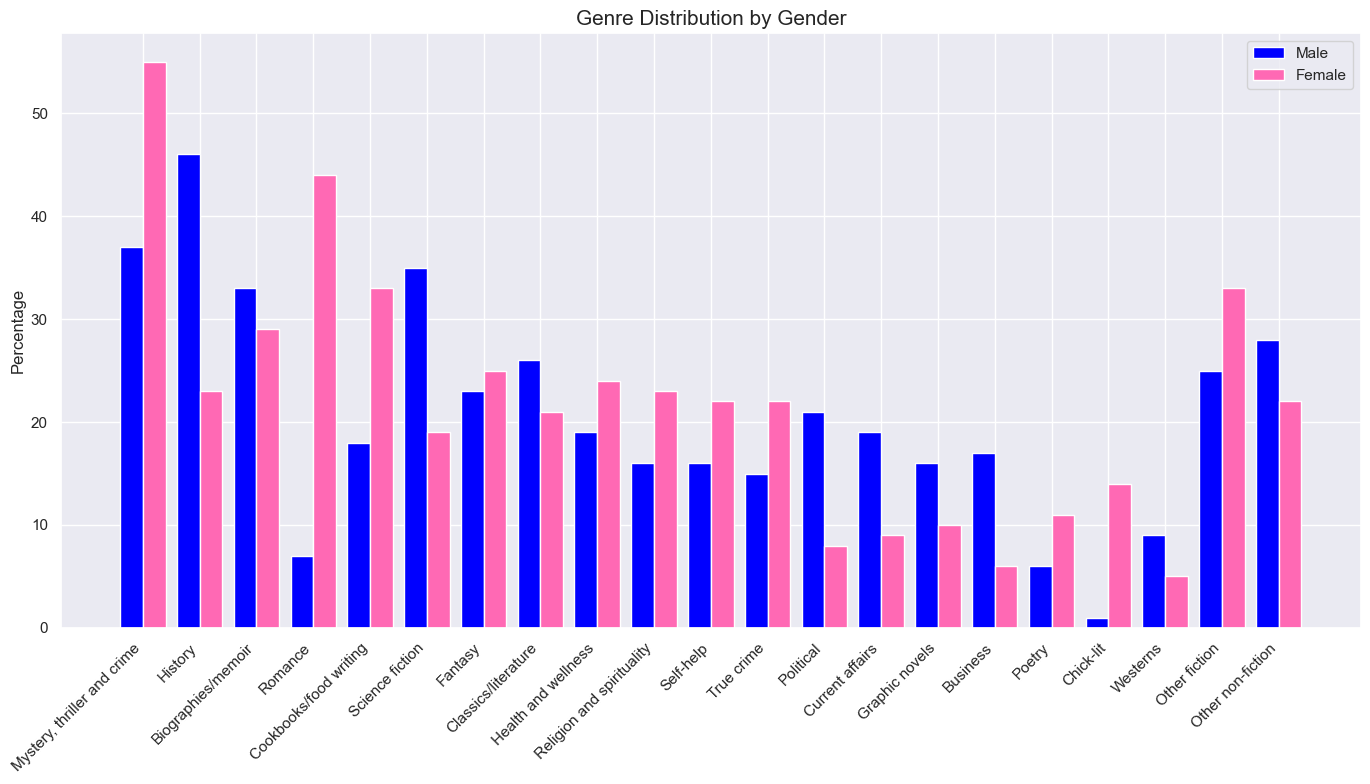

In [8]:
sns.set_theme()
# Read the data
genreByGender = pd.read_csv('../Data/book_genres_gender.csv', skiprows=2)
genre = genreByGender['Unnamed: 0'].values
male = genreByGender['Male'].values
female = genreByGender['Female'].values

# Create position indexes for genres
x = np.arange(len(genre))
bar_width = 0.4

# Plot vertical bars
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(x - bar_width/2, male, width=bar_width, label='Male', color='blue')
ax.bar(x + bar_width/2, female, width=bar_width, label='Female', color='hotpink')

# Add labels and legend
ax.set_xticks(x)
ax.set_xticklabels(genre, rotation=45, ha='right')
ax.set_ylabel("Percentage")
ax.set_title("Genre Distribution by Gender", fontsize=15)
ax.legend()

plt.tight_layout()
plt.show()